In [1]:
import pandas as pd
from pandasql import sqldf

In [4]:
dfs = []
for i in range(442):
    try:
        dfs.append(pd.read_csv("../reports/results/range_name_{}.csv".format(str(i).zfill(3))).drop(["Unnamed: 0"], axis=1))        
    except:
        dfs.append(pd.read_csv("../reports/results/CO_RFI_vs_BN_call_{}.csv".format(str(i).zfill(3))).drop(["Unnamed: 0"], axis=1))                
df = pd.concat(dfs, axis=0)

In [5]:
df.head()


,flop,board_type,0b,1b,2b,profit
0,"[14, 14, 13]",two-tone,0,0,0,1.053372
1,"[14, 14, 13]",two-tone,1,1,1,1.684726
2,"[14, 14, 13]",two-tone,2,2,2,1.828984
3,"[14, 14, 13]",two-tone,3,2,2,2.109554
4,"[14, 14, 13]",two-tone,7,5,4,2.162975


In [6]:
df2 = sqldf("""select * from df a
        INNER JOIN (select flop, max(profit) AS max_profit from df group by 1) b on
        b.flop = a.flop and a.profit = b.max_profit
       order by 1 desc"""
      ,globals())
df2.to_csv("../reports/condensed_results/CO_RFI_vs_BN_call.csv")

In [7]:
df2.columns = ["_" + col for col in df2.columns]

In [8]:
sqldf("select _0b, _1b, _2b, count(*), max(_flop), min(_flop) from df2 group by 1,2,3 order by 4 desc" , globals())

,_0b,_1b,_2b,count(*),max(_flop),min(_flop)
0,1,1,1,229,"[9, 9, 5]","[10, 10, 6]"
1,2,2,2,46,"[9, 8, 7]","[11, 9, 7]"
2,1,0,0,37,"[9, 9, 4]","[10, 10, 2]"
3,1,0,1,24,"[8, 8, 5]","[12, 8, 2]"
4,1,1,2,14,"[9, 7, 4]","[10, 8, 4]"
5,1,2,1,12,"[12, 11, 4]","[10, 9, 2]"
6,8,6,4,8,"[14, 14, 13]","[14, 11, 11]"
7,16,10,6,8,"[9, 9, 7]","[10, 10, 8]"
8,3,2,2,7,"[14, 13, 9]","[12, 9, 9]"
9,8,6,3,6,"[14, 9, 9]","[12, 7, 7]"


/Users/petermyers/Desktop/Code/commons/venv/lib/python3.6/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x114895b70> has a label of '_profit' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


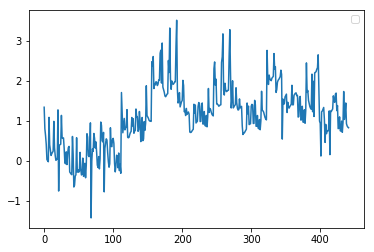

In [11]:
df2[["_profit"]].plot()

In [16]:
df2.columns = ["_flop", "_board_type", "_0b", "_1b", "_2b", "profit", "temp", "temp2"]
df2.drop(["temp", "temp2"], axis=1, inplace=True)

In [27]:
df2["rank1"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[0]).astype(int)
df2["rank2"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[1]).astype(int)
df2["rank3"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[2]).astype(int)

In [28]:
def val_difference_from_val(val1, val2):
    return val1 - val2

df2['range'] = df2[["rank1", "rank3"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)
df2['top_range'] = df2[["rank1", "rank2"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)
df2['bottom_range'] = df2[["rank2", "rank3"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)





In [31]:
df2.drop(["_flop"], axis=1, inplace=True)


In [33]:
df2.drop(["_board_type"], axis=1, inplace=True)


In [35]:
df2.drop(["profit"], axis=1, inplace=True)


In [62]:
df2["_0b"] = df2["_0b"].astype(str)
df2["_1b"] = df2["_1b"].astype(str)
df2["_2b"] = df2["_2b"].astype(str)
df2["_0b"] = df2["_0b"].apply(lambda x: x.zfill(2))
df2["_1b"] = df2["_1b"].apply(lambda x: x.zfill(2))
df2["_2b"] = df2["_2b"].apply(lambda x: x.zfill(2))

In [63]:
df2.head()

,_0b,_1b,_2b,rank1,rank2,rank3,range,top_range,bottom_range
0,16,11,10,9,9,8,1.0,0.0,1.0
1,16,10,06,9,9,7,2.0,0.0,2.0
2,16,11,08,9,9,6,3.0,0.0,3.0
3,01,01,01,9,9,5,4.0,0.0,4.0
4,01,00,00,9,9,4,5.0,0.0,5.0


max_depth 1 accuracy 0.7262443438914027
max_depth 2 accuracy 0.751131221719457
max_depth 3 accuracy 0.7895927601809954
max_depth 4 accuracy 0.8167420814479638
max_depth 5 accuracy 0.8642533936651584
max_depth 6 accuracy 0.9072398190045249
max_depth 7 accuracy 0.9524886877828054
max_depth 8 accuracy 0.9683257918552036
max_depth 9 accuracy 0.9819004524886877
max_depth 10 accuracy 0.9909502262443439
max_depth 11 accuracy 0.997737556561086


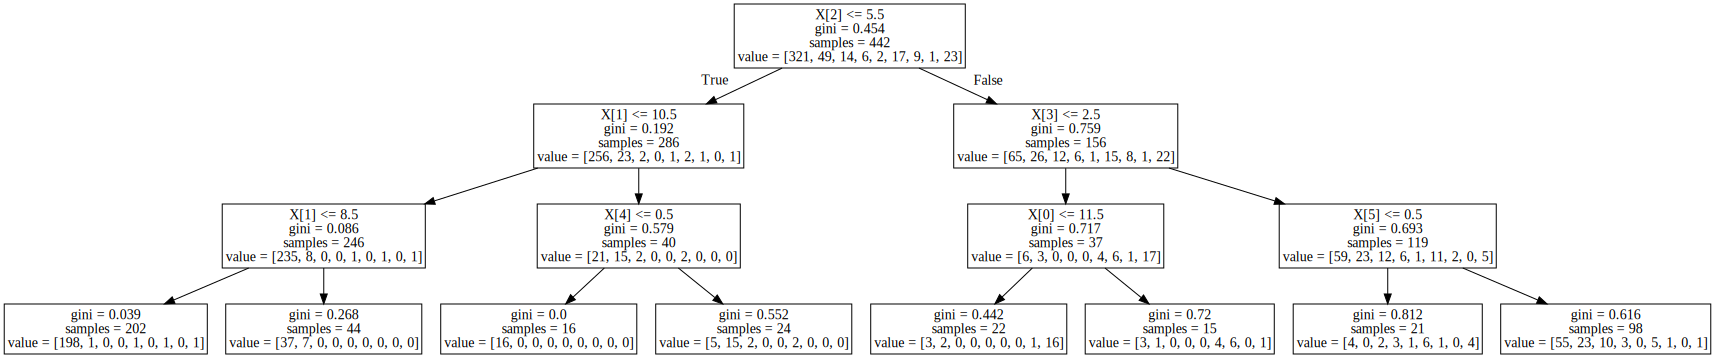

In [82]:

%matplotlib inline
import numpy as np
from sklearn import tree
from graphviz import Source
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz


focus = "_0b"
outputs = ["_0b", "_1b", "_2b"]
max_depth = 3

# X and y
X = df2.drop(outputs, axis=1).values
y = df2[focus].values

for i in range(1,12):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X, y)
    pred = clf.predict(X)

    final_df = df2.copy()
    final_df['pred_{}'.format(focus)] = pred
    accuracy = accuracy_score(df2[focus].values, pred)
    print("max_depth", i, "accuracy", accuracy)

clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf = clf.fit(X, y)
pred = clf.predict(X)
# CSV if you want to review results
# final_df.to_csv("output/{}_predictions.csv".format(focus))

# Graph
dot_data = export_graphviz(clf, out_file=None)
graph = Source(dot_data)
graph.render("../reports/figures/CO_RFI_vs_BN_call_{}".format(focus))
graph



In [65]:
for i, j in zip(df2.drop(outputs, axis=1).columns, range(len(df2.drop(outputs, axis=1).columns))):
    print(j,i)

0 rank1
1 rank2
2 rank3
3 range
4 top_range
5 bottom_range


In [81]:
pd.DataFrame(df2[focus].value_counts()).reset_index().sort_values(by=["index"]).set_index(["index"])

,_0b
index,
01,321
02,49
03,14
04,6
05,2
08,17
10,9
13,1
16,23
